# Super market sales Analysis

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
sales = pd.read_csv('supermarket_sales - Sheet1.csv')

In [5]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

By inspection, the 'Date' datatype is an object, we need to change it to datetime

In [7]:
sales['date'] = pd.to_datetime(sales['Date'])

In [8]:
sales['date'].dtype

dtype('<M8[ns]')

In [9]:
type(sales['date'])

pandas.core.series.Series

In [10]:
sales['date'] = pd.to_datetime(sales['date'])

In [11]:
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

In [12]:
sales['Time'] = pd.to_datetime(sales['Time'])

In [13]:
  sales['Hour'] = (sales['Time']).dt.hour    #type(sales['Time'])

Let's see the unique hours of sales in this dataset

In [14]:
sales['Hour'].nunique()  #gives us the number of unique hours 

11

In [15]:
  sales['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [16]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2024-08-12 15:24:41.880000,307.58738,4.761905,15.379369,6.97270,2019-02-14 00:05:45.600000,15.256000,1.993000,2019.0,14.910000
min,10.080000,1.000000,0.508500,10.678500,2024-08-12 10:00:00,10.17000,4.761905,0.508500,4.00000,2019-01-01 00:00:00,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,2024-08-12 12:43:00,118.49750,4.761905,5.924875,5.50000,2019-01-24 00:00:00,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,2024-08-12 15:19:00,241.76000,4.761905,12.088000,7.00000,2019-02-13 00:00:00,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2024-08-12 18:15:00,448.90500,4.761905,22.445250,8.50000,2019-03-08 00:00:00,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2024-08-12 20:59:00,993.00000,4.761905,49.650000,10.00000,2019-03-30 00:00:00,31.000000,3.000000,2019.0,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858,NaN,8.693563,0.835254,0.0,3.186857


 ### Let's find the number of unique values in columns with object datatype

In [17]:
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]

In [18]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [19]:
print("# unique values in Branch: {0}".format(len(sales['Branch'].unique().tolist())))
print("# unique values in City: {0}".format(len(sales['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(sales['Customer type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(sales['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(sales['Product line'].unique().tolist())))
print("# unique values in Payment: {0}".format(len(sales['Payment'].unique().tolist())))

# unique values in Branch: 3
# unique values in City: 3
# unique values in Customer Type: 2
# unique values in Gender: 2
# unique values in Product Line: 6
# unique values in Payment: 3


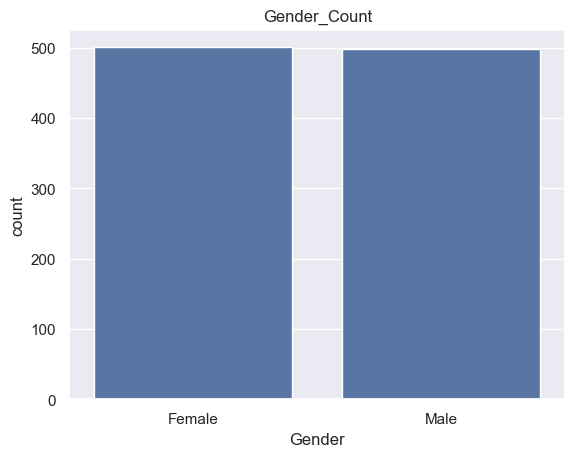

In [20]:
sns.set(style="darkgrid")       #style the plot background to become a grid
genderCount  = sns.countplot(x="Gender", data =sales).set_title("Gender_Count")



Text(0.5, 1.0, 'Ratings by Branch')

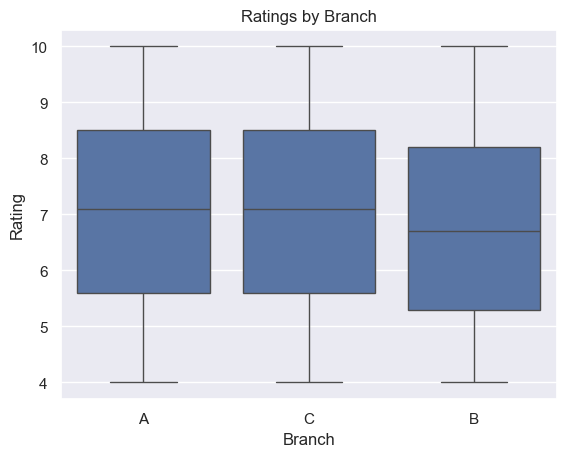

In [21]:
 sns.boxplot(x="Branch", y = "Rating" ,data =sales).set_title("Ratings by Branch") 

Branch B has the lowest rating among all the branches

*Sales by the hour in the comapny* Most of the item were sold around 14:00 hrs local time

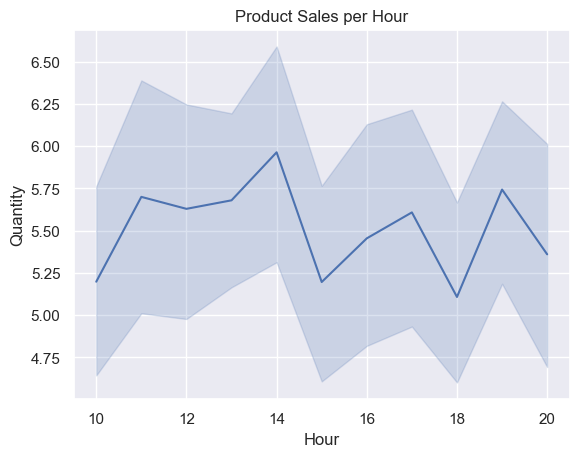

In [22]:
genderCount  = sns.lineplot(x="Hour",  y = 'Quantity',data =sales).set_title("Product Sales per Hour")

Below we can see how each branch's sales quantity looks like by the hour in a monthly fashion 

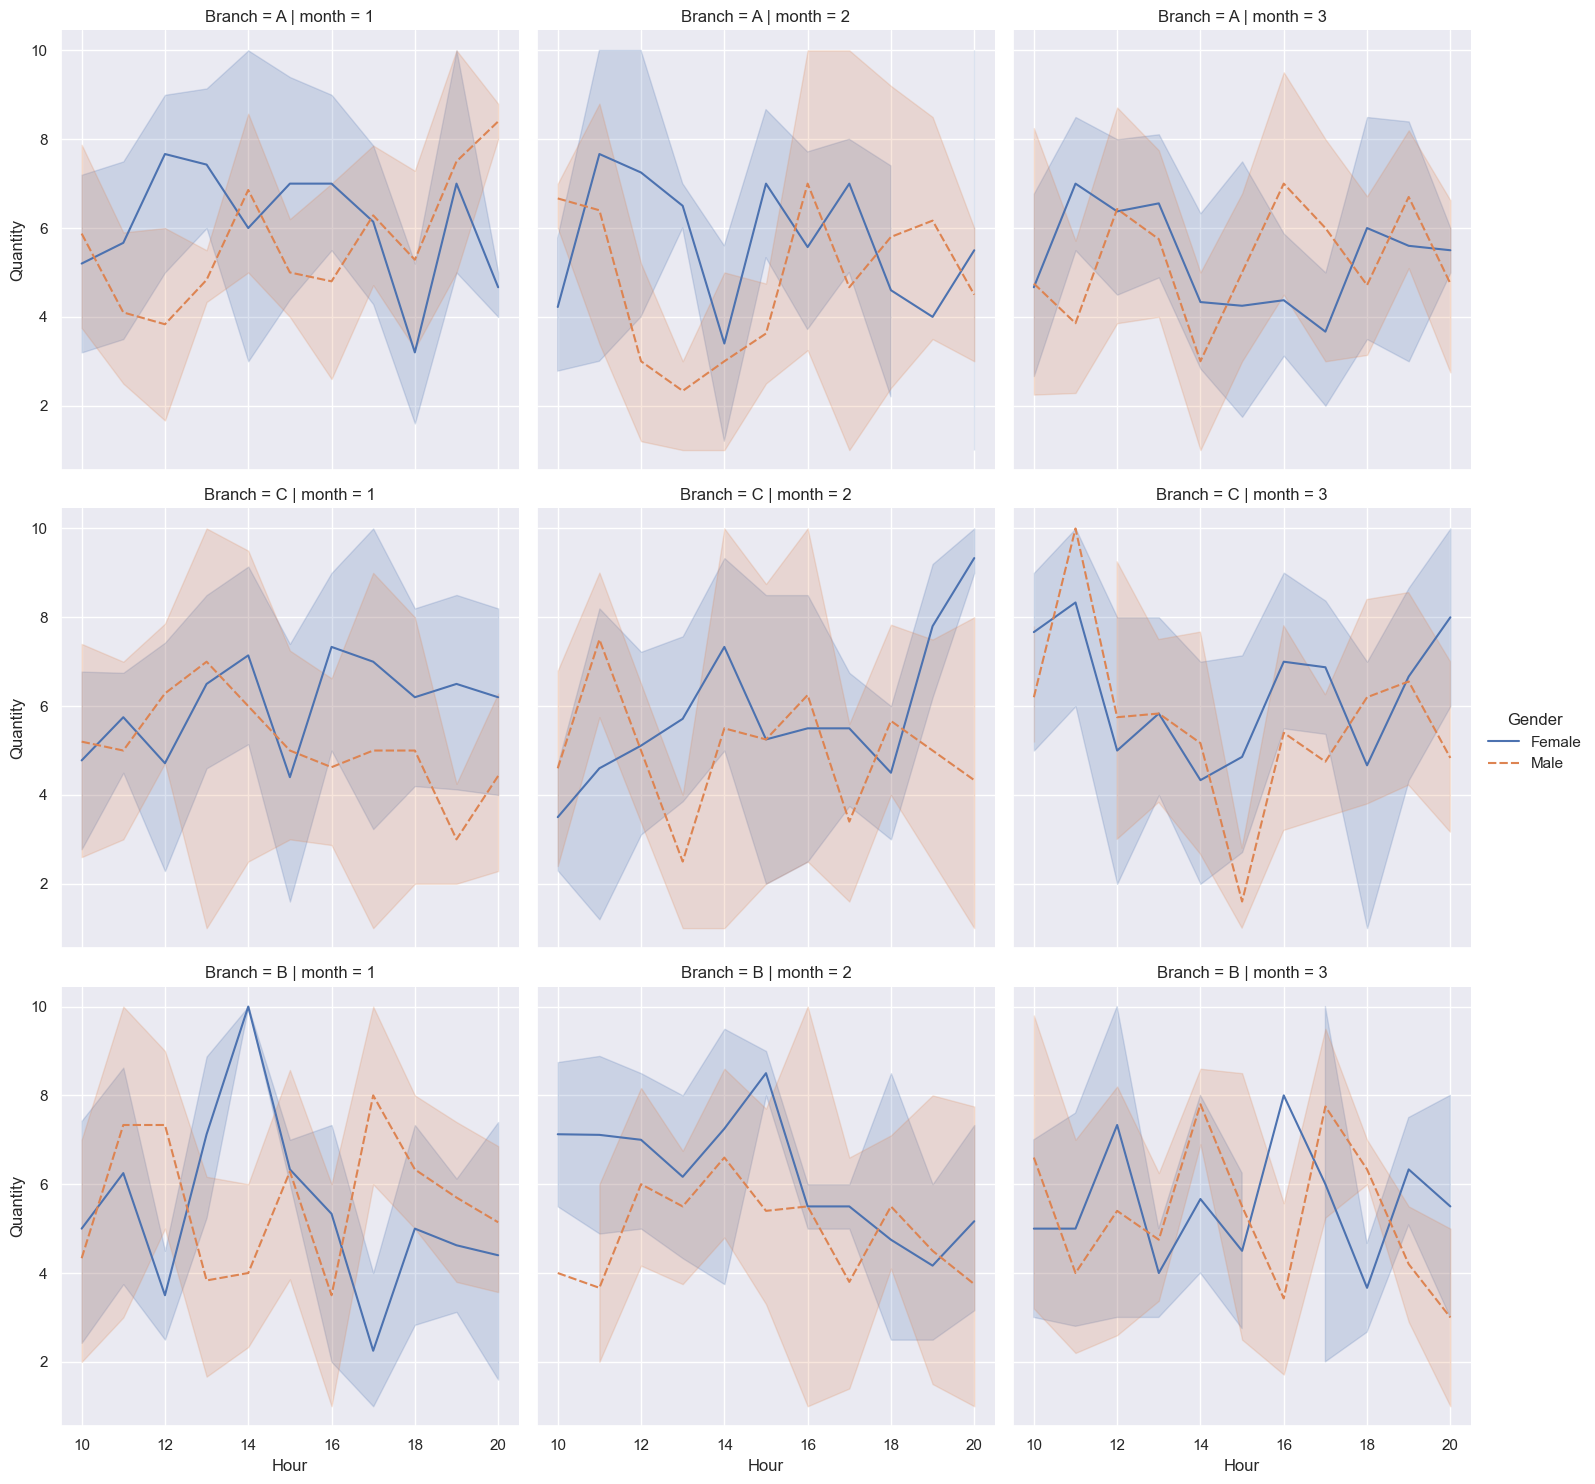

In [23]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =sales)

 Below we can see each branch's sales by the hour in a monthly fashion 

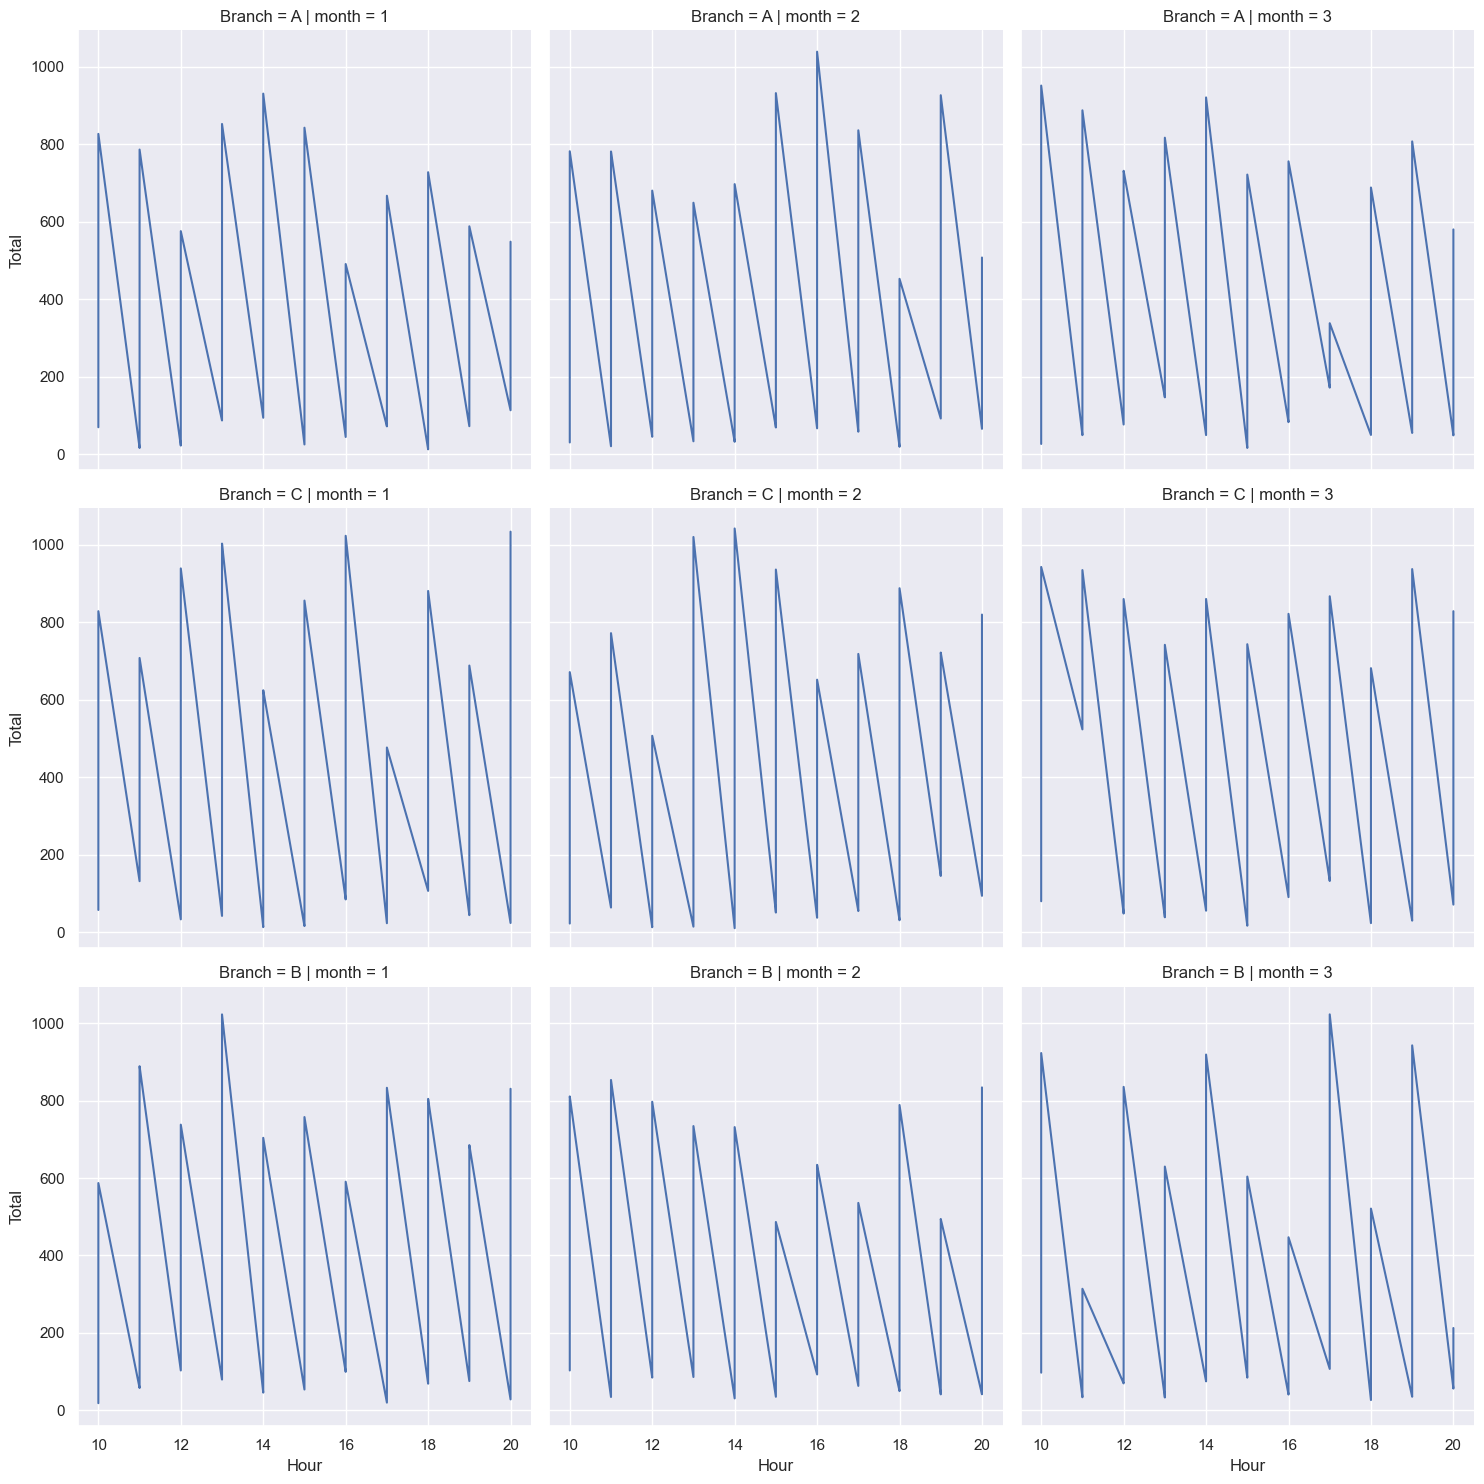

In [25]:
genderCount  = sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =sales)

In [26]:
sales['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

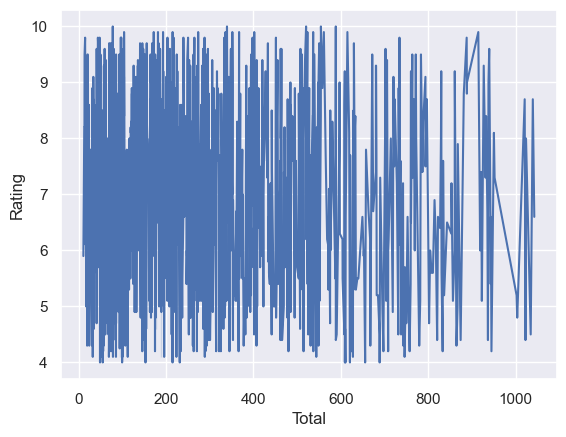

In [27]:
ageDisSpend = sns.lineplot(x="Total", y = "Rating", data =sales)

## Product Analysis

Let's look at the various products' performance.

<Axes: xlabel='Quantity', ylabel='Product line'>

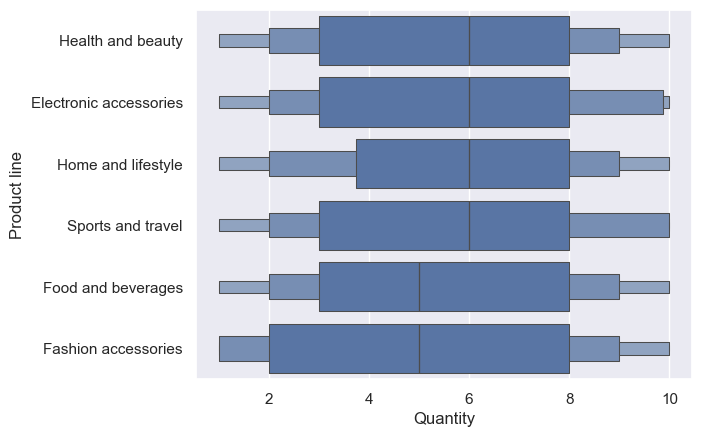

In [28]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=sales )

From the above visual, Health and Beauty,Electronic accessories, Homem and lifestyle, Sports and travel have a better average quantity sales that food and beverages as well as Fashion accessories. 

<Axes: xlabel='count', ylabel='Product line'>

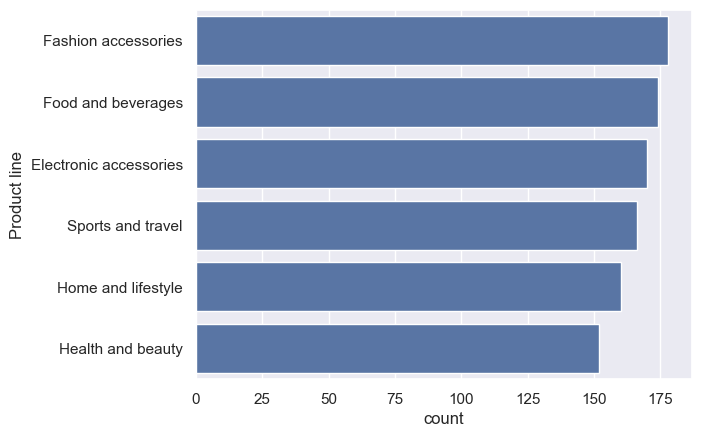

In [29]:
sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index )

From the above image shows the top product line item type sold in the given dataset. Fashion Accessories is the highest while Health and beauty is the lowest

<Axes: xlabel='Total', ylabel='Product line'>

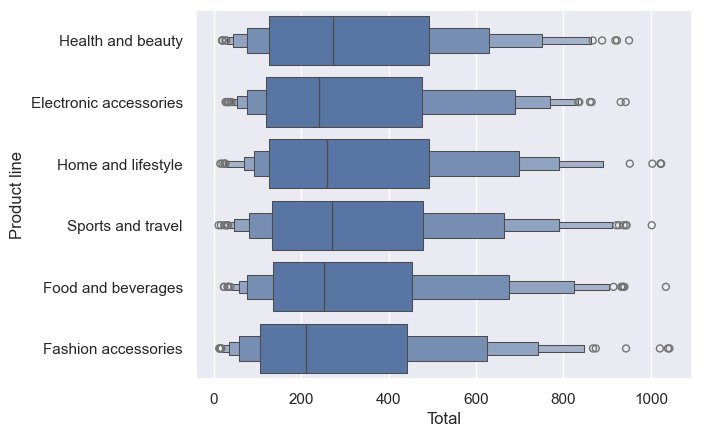

In [30]:
sns.boxenplot(y = 'Product line', x = 'Total', data=sales )

<Axes: xlabel='Total', ylabel='Product line'>

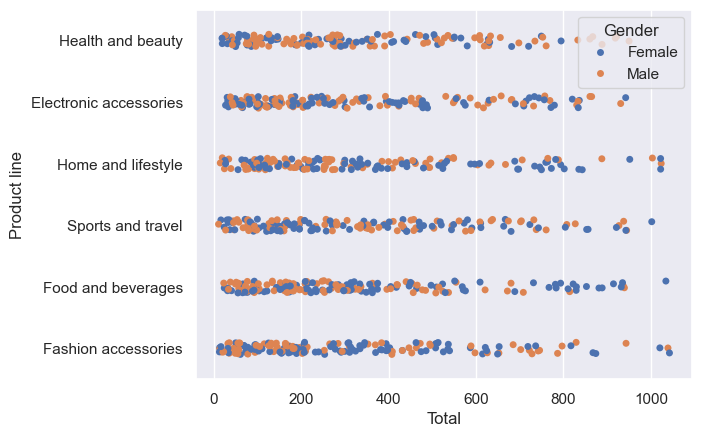

In [31]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=sales )

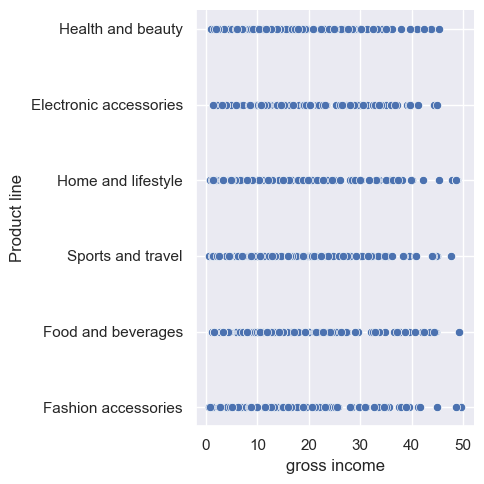

In [32]:
sns.relplot(y = 'Product line', x = 'gross income', data=sales )

<Axes: xlabel='Rating', ylabel='Product line'>

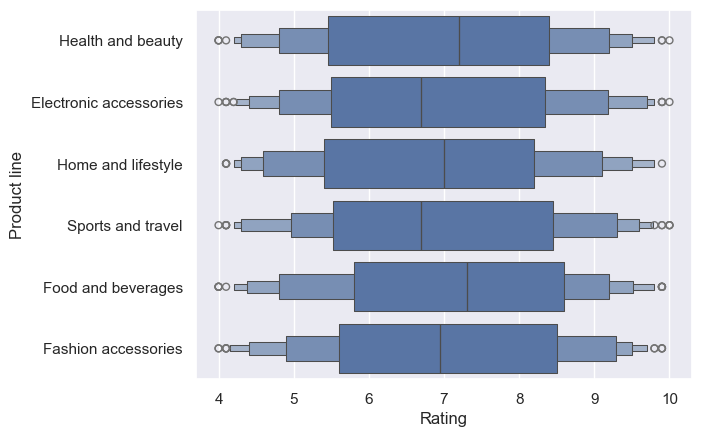

In [33]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=sales )

Food and Beverages have the highest average rating while sports and travel the lowest

Let's see when customers buy certain products in the various branches. 

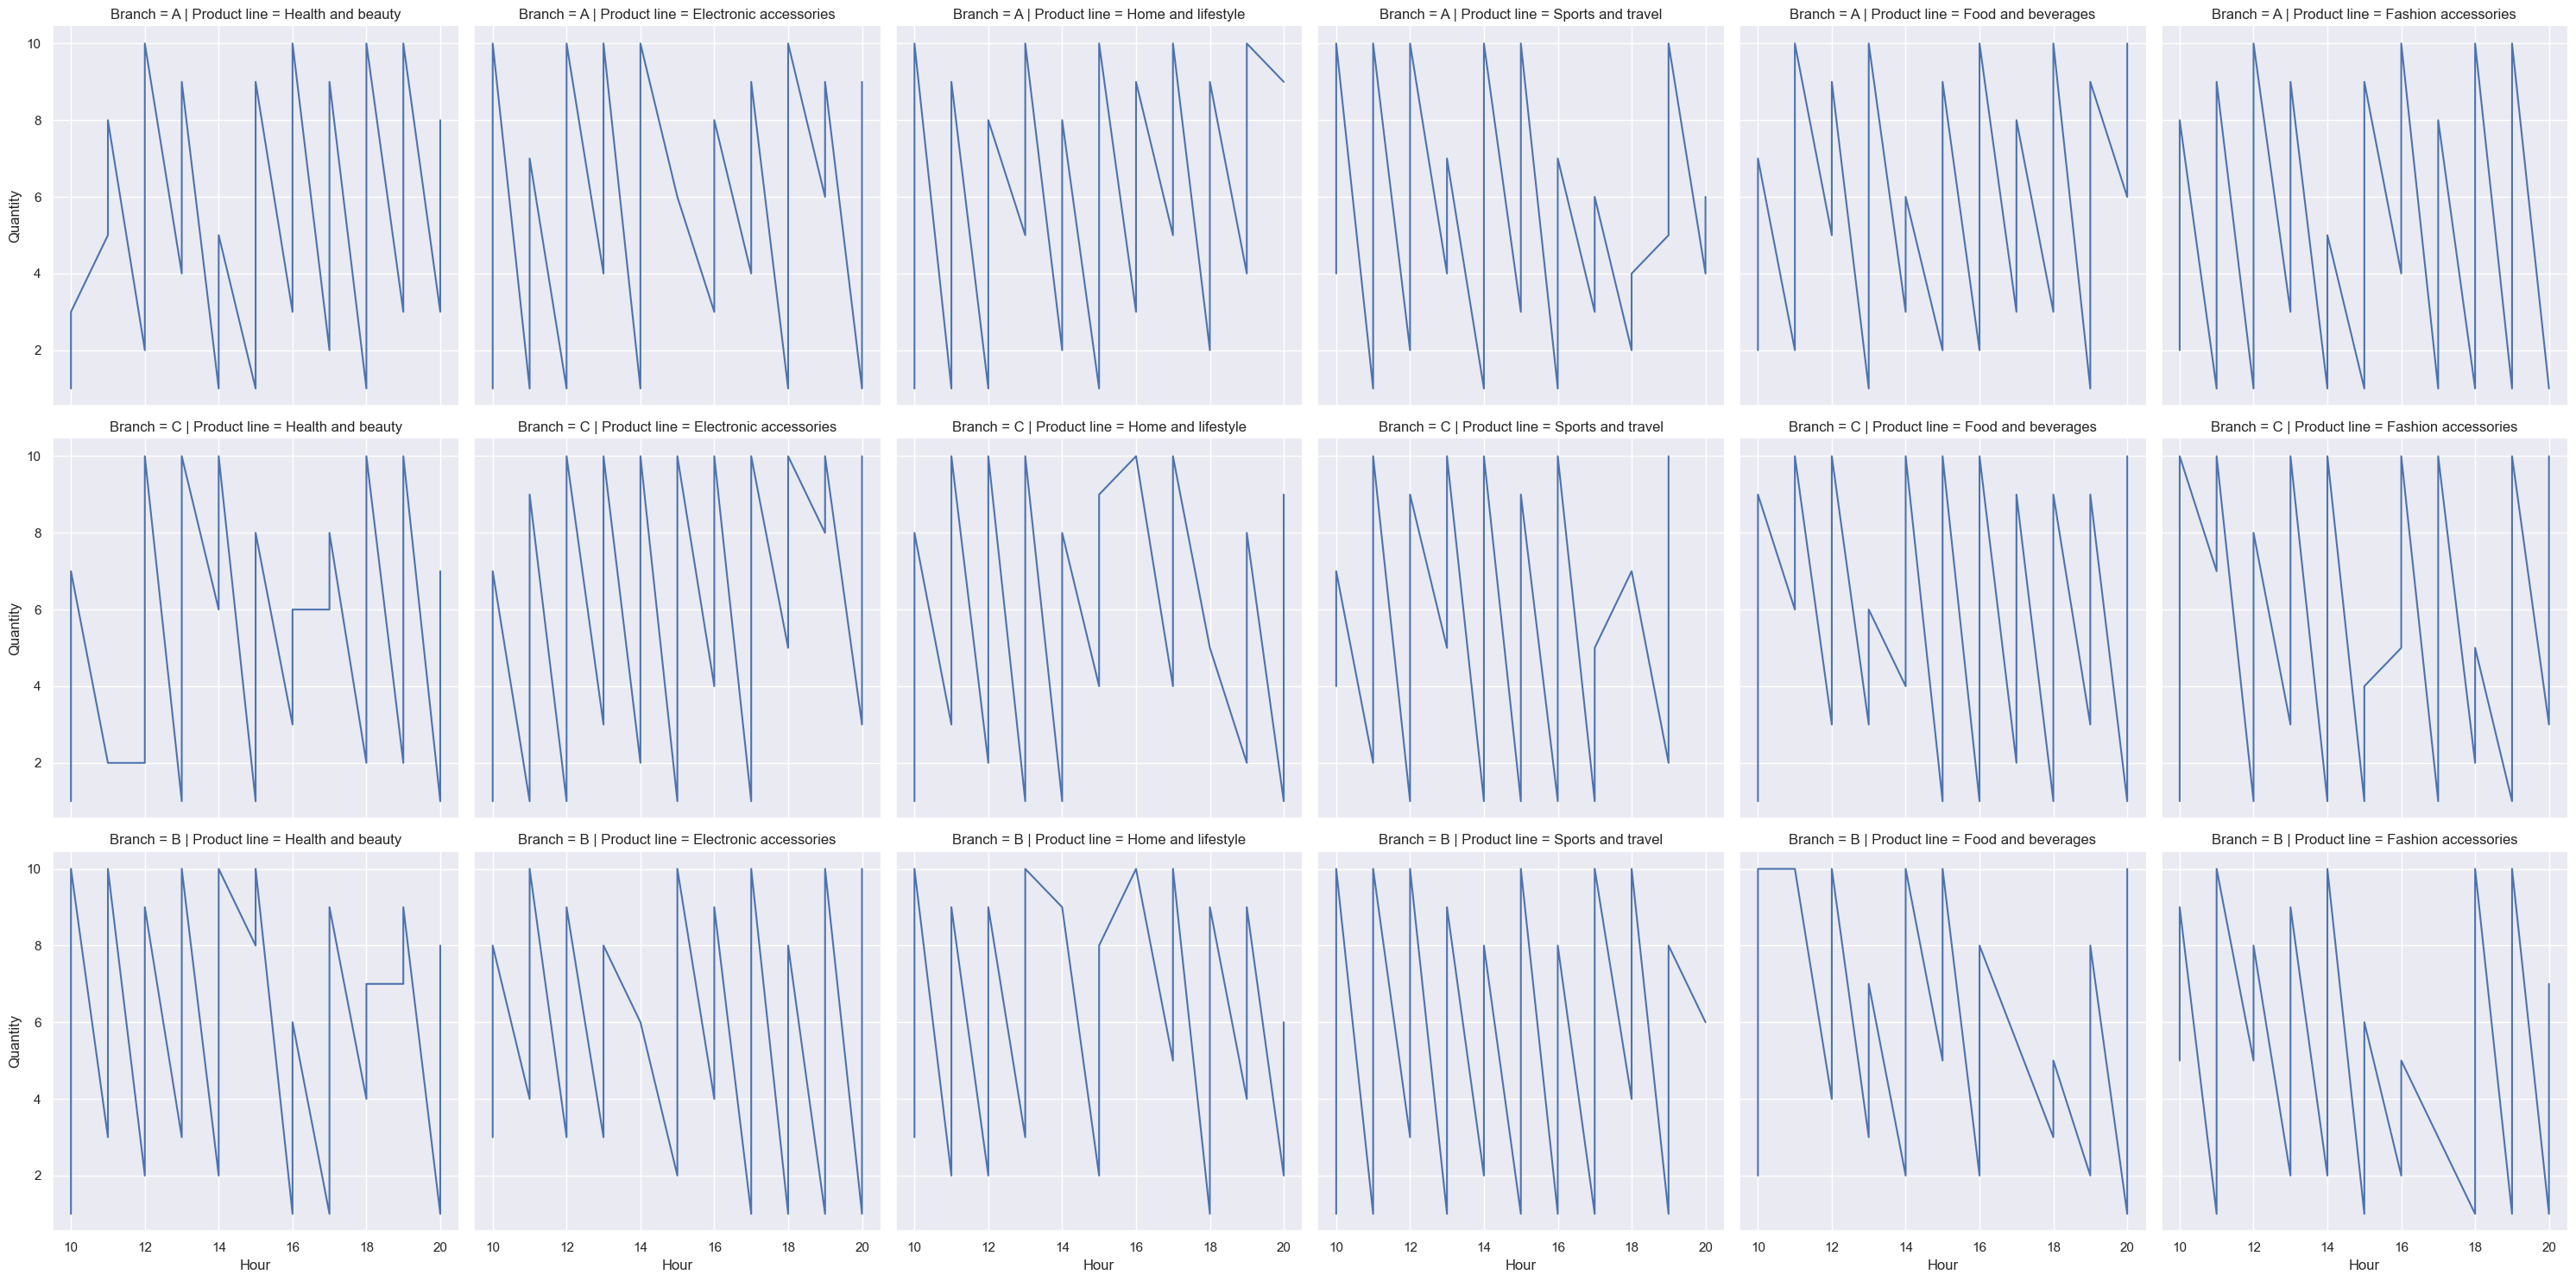

In [34]:
productCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =sales)

From the above plots, we can see that food and beverages sales usually high in all three branches at evening especially around 19:00 

# Payment Channel

Let see how customers make payment in this business

Text(0.5, 1.0, 'Payment Channel')

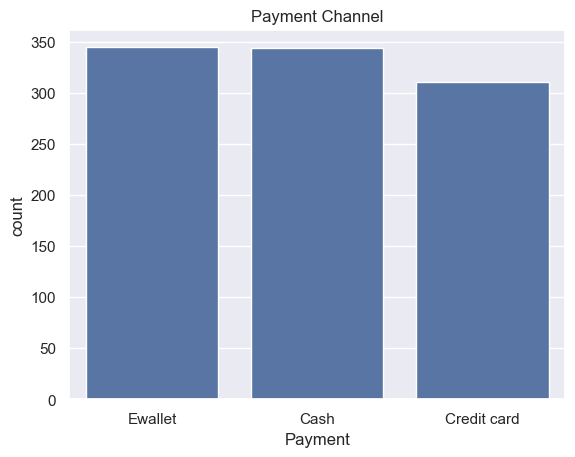

In [35]:
 sns.countplot(x="Payment", data =sales).set_title("Payment Channel") 

Most of the customers pay through the Ewallet and Cash Payment while under 40 percent of them pay with their credit card. We would also like to see this payment type distribution across all the branches

Text(0.5, 1.0, 'Payment Channel by Branch')

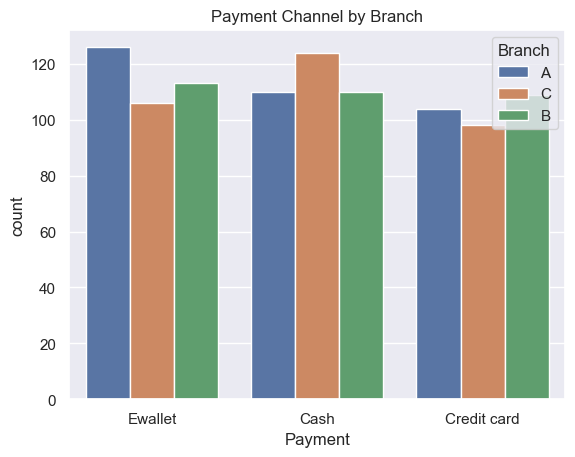

In [36]:
 sns.countplot(x="Payment", hue = "Branch", data =sales).set_title("Payment Channel by Branch") 

# Customer Analysis

From inspection, there are two types of customers. Members and Normal. Let's see how many they are and where they are 

In [37]:
sales['Customer type'].nunique()

2

Text(0.5, 1.0, 'Customer Type')

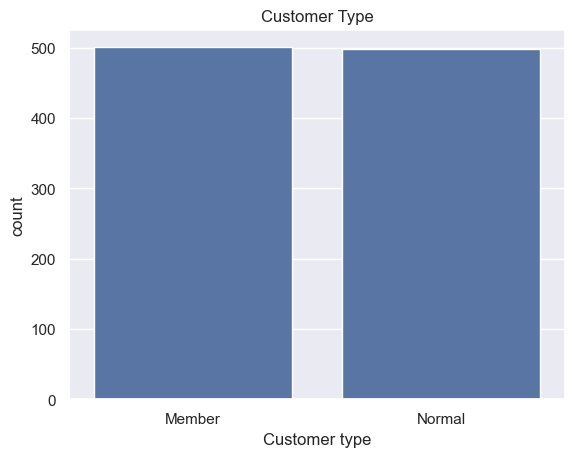

In [38]:
 sns.countplot(x="Customer type", data =sales).set_title("Customer Type") 

Text(0.5, 1.0, 'Customer Type by Branch')

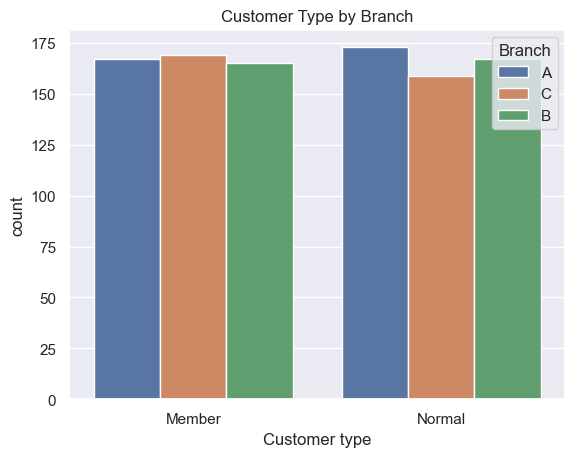

In [39]:
 sns.countplot(x="Customer type", hue = "Branch", data =sales).set_title("Customer Type by Branch") 

## Does customer type influences the sales 

In [40]:
sales.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


<Axes: xlabel='Customer type', ylabel='Total'>

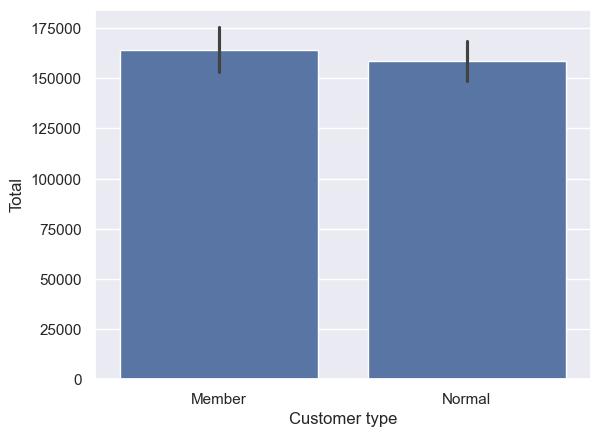

In [41]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=sales)

Do the customer type influence customer rating? Let's find out 

Text(0.5, 1.0, 'Customer Type')

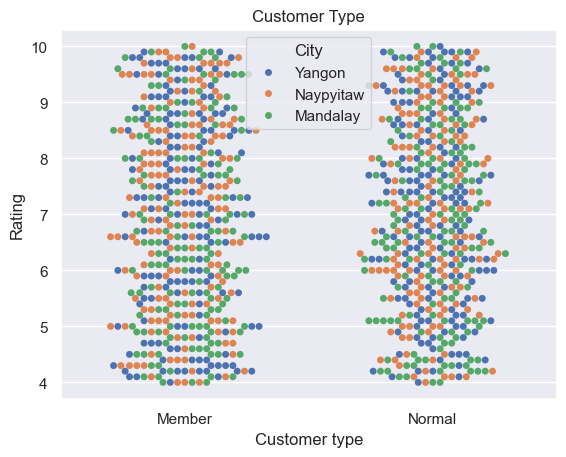

In [42]:
 sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =sales).set_title("Customer Type") 

With the use of google search, I was able to get the longitude and latitude of each cities. We can 

In [43]:
long = {"Yangon": 16.8661, "Naypyitaw": 19.7633, "Mandalay": 21.9588 }
lat = {"Yangon": 96.1951, "Naypyitaw": 96.0785, "Mandalay": 96.0891 }
for set in sales:
    sales['long'] = sales['City'].map(long)
    sales['lat'] = sales['City'].map(lat)

Text(0.5, 1.0, 'Customer Type')

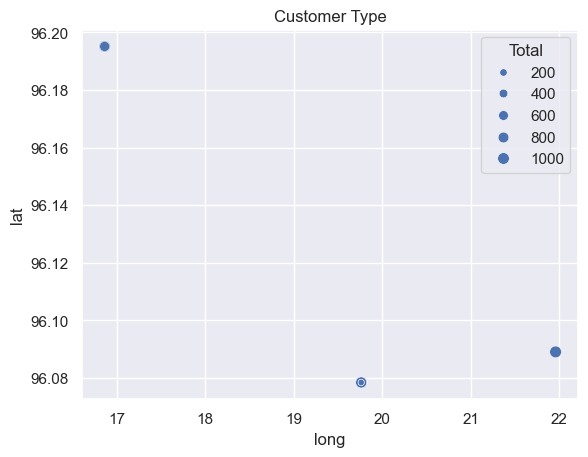

In [44]:
 sns.scatterplot(x="long",  y = "lat",size = "Total", data =sales, legend = "brief").set_title("Customer Type") 

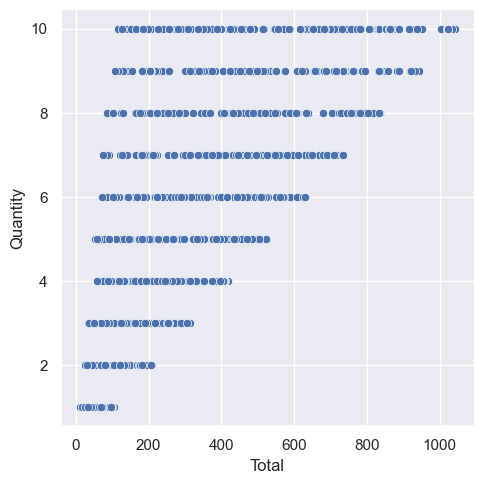

In [45]:
 sns.relplot(x="Total",  y = "Quantity", data =sales)

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

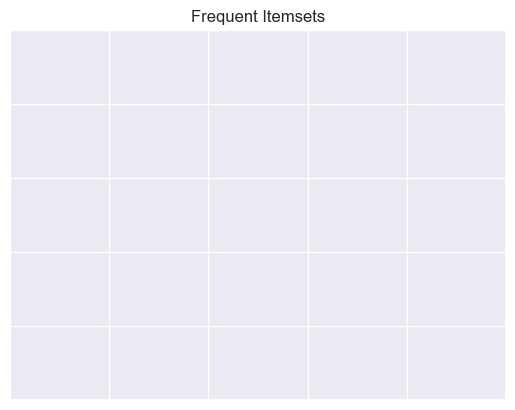

In [46]:
from apyori import apriori
import networkx as nx
# Load the sales data
sales_data = pd.read_csv('supermarket_sales - Sheet1.csv')
# Print the first few rows and column names
print(sales_data.head())
print(sales_data.columns)
# Convert the data into a format suitable for the Apriori algorithm
transactions = []
for index, row in sales_data.iterrows():
    transaction = [item for item in row['Product line'].split(',')]
    transactions.append(transaction)
# Run the Apriori algorithm to find frequent itemsets
rules = apriori(transactions, min_support=0.01, min_confidence=0.5, min_lift=3)
results = list(rules)
# Extract the most frequent itemsets
frequent_itemsets = [list(result.items) for result in results if len(result.items) > 1]
# Create a graph to store the recommendations
G = nx.Graph()
# Iterate through the frequent itemsets and add edges to the graph
for itemset in frequent_itemsets:
    for i in range(len(itemset)):
        for j in range(i+1, len(itemset)):
            G.add_edge(itemset[i], itemset[j])
# Plot the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Frequent Itemsets")
plt.show()

In [47]:
x=sales[['Branch','City','Customer type','Gender','Product line','Payment']]
y=sales['Rating']
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [49]:
len(x_train)

800

In [50]:
len(x_test)

200

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train['Branch'] = le.fit_transform(x_train['Branch'])
x_train['City'] = le.fit_transform(x_train['City'])
x_train['Customer type'] = le.fit_transform(x_train['Customer type'])
x_train['Gender'] = le.fit_transform(x_train['Gender'])
x_train['Product line'] = le.fit_transform(x_train['Product line'])
x_train['Payment'] = le.fit_transform(x_train['Payment'])
x_test['Branch'] = le.fit_transform(x_test['Branch'])
x_test['City'] = le.fit_transform(x_test['City'])
x_test['Customer type'] = le.fit_transform(x_test['Customer type'])
x_test['Gender'] = le.fit_transform(x_test['Gender'])
x_test['Product line'] = le.fit_transform(x_test['Product line'])
x_test['Payment'] = le.fit_transform(x_test['Payment'])

In [52]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(scaled_x_train,y_train)
predictions=lr.predict(x_test)

In [54]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 1.52


In [56]:
from sklearn.metrics import mean_squared_error
mae = mean_squared_error(y_test, predictions)
print(f"Mean squared Error: {mae:.2f}")

Mean squared Error: 3.25


In [57]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(scaled_x_train,y_train)
rfr.score(scaled_x_train,y_train)

0.2733703899367542

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(x)

In [59]:
from sklearn.metrics.pairwise import cosine_similarity
Similarity_Score=cosine_similarity(x)
Similarity_Score

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [60]:
favourite =input("want:")

want: Health and beauty


In [61]:
all_list=sales['Product line'].tolist()
import difflib
recommended=difflib.get_close_matches(favourite,all_list)
print(recommended)

['Health and beauty', 'Health and beauty', 'Health and beauty']


In [62]:
close_match=recommended[0]
print(close_match)

Health and beauty


In [63]:
index_of_close_match = sales.loc[sales['Product line'] == close_match, 'Invoice ID'].values[0]
print(index_of_close_match)

750-67-8428
